# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Carregar a base 
df_sinasc = pd.read_csv("SINASC_RO_2019.csv", sep=",", encoding="latin1")
df_sinasc.columns = df_sinasc.columns.str.replace('"', '').str.strip()

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [9]:
def categorizar_apgar5(valor):
    if pd.isnull(valor):
        return None
    elif valor <= 3:
        return 'asfixia grave'
    elif valor <= 5:
        return 'asfixia moderada'
    elif valor <= 7:
        return 'asfixia leve'
    else:
        return 'normal'

df_sinasc['APGAR5_CATEGORIA'] = df_sinasc['APGAR5'].apply(categorizar_apgar5)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

Text(0.5, 1.0, 'Distribuição de APGAR5 por Sexo (todas gestações)')

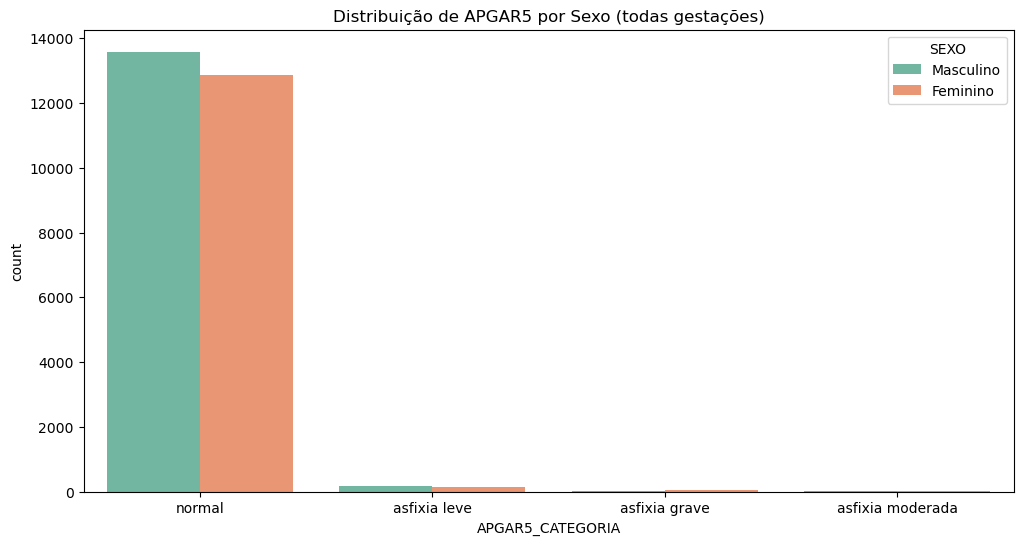

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_sinasc,
    x='APGAR5_CATEGORIA',
    hue='SEXO',
    palette='Set2'
)
plt.title('Distribuição de APGAR5 por Sexo (todas gestações)')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
# Tabela cruzada: GESTACAO nas linhas × APGAR5_CATEGORIA nas colunas
tabela_cruzada = pd.crosstab(df_sinasc['GESTACAO'], df_sinasc['APGAR5_CATEGORIA'])

# Visualizar a tabela
print(tabela_cruzada)

APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas                 21            12                 1      51
28 a 31 semanas                  3            18                12     129
32 a 36 semanas                  8            73                19    2134
37 a 41 semanas                 33           196                28   22266
42 semanas e mais                1             6                 1     690
Menos de 22 semanas              2             1                 0       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [12]:
# Calcular percentuais por linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Arredondar para facilitar visualização
percentuais_linha = percentuais_linha.round(2)

# Visualizar a tabela de percentuais
print(percentuais_linha)

APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas              24.71         14.12              1.18   60.00
28 a 31 semanas               1.85         11.11              7.41   79.63
32 a 36 semanas               0.36          3.27              0.85   95.52
37 a 41 semanas               0.15          0.87              0.12   98.86
42 semanas e mais             0.14          0.86              0.14   98.85
Menos de 22 semanas          28.57         14.29              0.00   57.14


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

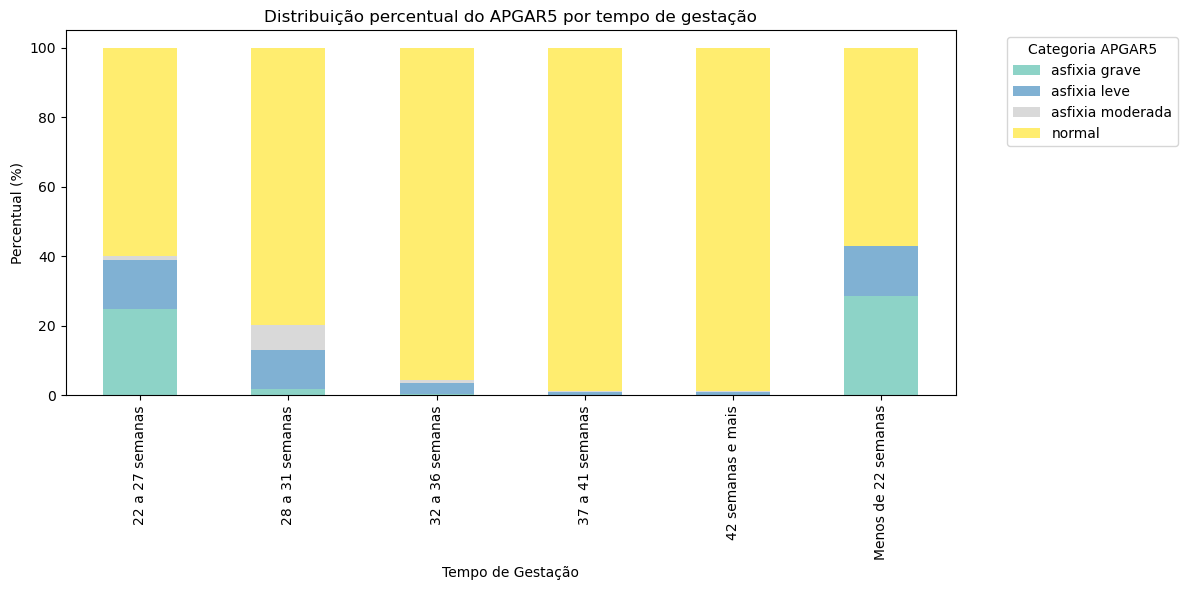

In [13]:
# Plotar gráfico de barras empilhadas com os percentuais da Tarefa 5
percentuais_linha.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set3'
)

plt.title('Distribuição percentual do APGAR5 por tempo de gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual (%)')
plt.legend(title='Categoria APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

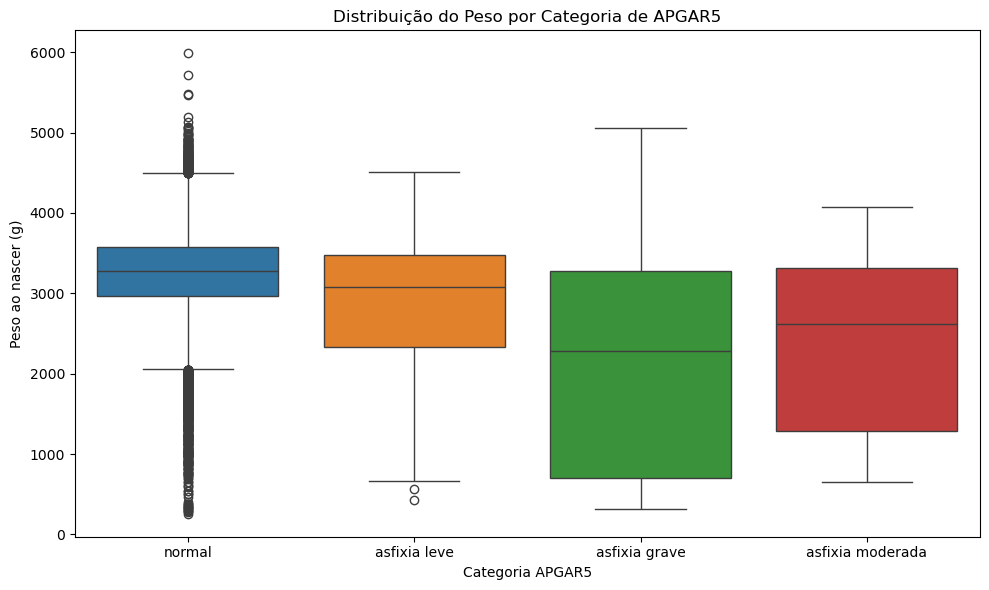

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_sinasc,
    x='APGAR5_CATEGORIA',
    y='PESO',
    hue='APGAR5_CATEGORIA',
    legend=False
)

plt.title('Distribuição do Peso por Categoria de APGAR5')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Peso ao nascer (g)')
plt.tight_layout()
plt.show()